# Projet NBA – Machine Learning & Prédiction 🏀

## Objectifs

Ce projet vise à démontrer comment on peut exploiter les données ouvertes de la NBA pour :
1. Prédire l’issue d’un match (victoire d'une équipe)
2. Estimer la “valeur” potentielle d’un joueur NBA en fonction de ses performances statistiques

Nous utilisons :
- `nba_api` pour extraire les données NBA de la saison 2022-23
- `pandas` et `seaborn` pour explorer les données
- `scikit-learn` pour entraîner des modèles prédictifs

---

## À propos de l'API

`nba_api` est une librairie Python gratuite qui simule les appels du site [nba.com/stats](https://www.nba.com/stats), permettant d'accéder à :
- Tous les matchs (résultats, scores, stats)
- Tous les joueurs et leurs performances
- Les données historiques par saison, match, ou joueur

Aucune clé API n’est nécessaire.


In [9]:
# Installer nba_api si besoin
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nba_api.stats.static import teams, players
from nba_api.stats.endpoints import leaguegamefinder, playergamelog
import time


In [10]:
# Récupération des matchs
gamefinder = leaguegamefinder.LeagueGameFinder(season_nullable='2022-23')
games_df = gamefinder.get_data_frames()[0]

# Nettoyage
games_df = games_df[games_df['SEASON_ID'] == '22022']
games_df = games_df[['GAME_ID', 'TEAM_NAME', 'MATCHUP', 'GAME_DATE', 'WL', 'PTS', 'REB', 'AST', 'TOV', 'FG3M', 'MIN']]
games_df.sort_values('GAME_DATE', inplace=True)
games_df.reset_index(drop=True, inplace=True)

games_df.head()


,GAME_ID,TEAM_NAME,MATCHUP,GAME_DATE,WL,PTS,REB,AST,TOV,FG3M,MIN
0,0022200001,Boston Celtics,BOS vs. PHI,2022-10-18,W,126,36,24,10,12,240
1,0022200002,Golden State Warriors,GSW vs. LAL,2022-10-18,W,123,48,31,18,16,241
2,0022200002,Los Angeles Lakers,LAL @ GSW,2022-10-18,L,109,48,23,21,10,241
3,0022200001,Philadelphia 76ers,PHI @ BOS,2022-10-18,L,117,31,16,14,13,239
4,0022200014,Portland Trail Blazers,POR @ SAC,2022-10-19,W,115,44,20,11,11,239


In [11]:
games_df

,GAME_ID,TEAM_NAME,MATCHUP,GAME_DATE,WL,PTS,REB,AST,TOV,FG3M,MIN
0,0022200001,Boston Celtics,BOS vs. PHI,2022-10-18,W,126,36,24,10,12,240
1,0022200002,Golden State Warriors,GSW vs. LAL,2022-10-18,W,123,48,31,18,16,241
2,0022200002,Los Angeles Lakers,LAL @ GSW,2022-10-18,L,109,48,23,21,10,241
3,0022200001,Philadelphia 76ers,PHI @ BOS,2022-10-18,L,117,31,16,14,13,239
4,0022200014,Portland Trail Blazers,POR @ SAC,2022-10-19,W,115,44,20,11,11,239
...,...,...,...,...,...,...,...,...,...,...,...
3415,0022201230,Golden State Warriors,GSW @ POR,2023-04-09,W,157,58,47,15,27,240
3416,0022201222,Washington Wizards,WAS vs. HOU,2023-04-09,L,109,51,28,12,14,240
3417,0022201220,New York Knicks,NYK vs. IND,2023-04-09,L,136,53,29,15,15,241
3418,0022201226,Oklahoma City Thunder,OKC vs. MEM,2023-04-09,W,115,49,30,14,12,240


In [14]:
from nba_api.stats.static import players, teams
from nba_api.stats.endpoints import leaguegamefinder
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement des données matchs NBA – saison régulière 2022-23
gamefinder = leaguegamefinder.LeagueGameFinder(season_nullable='2022-23')
games_df = gamefinder.get_data_frames()[0]

# Nettoyage
games_df = games_df[games_df['SEASON_ID'] == '22022'].copy()
games_df.sort_values('GAME_DATE', inplace=True)
games_df.reset_index(drop=True, inplace=True)

games_df.head()


,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22022,1610612738,BOS,Boston Celtics,0022200001,2022-10-18,BOS vs. PHI,W,240,126,...,0.786,6,30,36,24,8,3,10,24,9.0
1,22022,1610612744,GSW,Golden State Warriors,0022200002,2022-10-18,GSW vs. LAL,W,241,123,...,0.739,11,37,48,31,11,4,18,23,14.0
2,22022,1610612747,LAL,Los Angeles Lakers,0022200002,2022-10-18,LAL @ GSW,L,241,109,...,0.760,9,39,48,23,12,4,21,18,-14.0
3,22022,1610612755,PHI,Philadelphia 76ers,0022200001,2022-10-18,PHI @ BOS,L,239,117,...,0.857,4,27,31,16,8,3,14,25,-9.0
4,22022,1610612757,POR,Portland Trail Blazers,0022200014,2022-10-19,POR @ SAC,W,239,115,...,0.788,11,33,44,20,11,2,11,17,7.0


In [15]:
games_df

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22022,1610612738,BOS,Boston Celtics,0022200001,2022-10-18,BOS vs. PHI,W,240,126,...,0.786,6,30,36,24,8,3,10,24,9.0
1,22022,1610612744,GSW,Golden State Warriors,0022200002,2022-10-18,GSW vs. LAL,W,241,123,...,0.739,11,37,48,31,11,4,18,23,14.0
2,22022,1610612747,LAL,Los Angeles Lakers,0022200002,2022-10-18,LAL @ GSW,L,241,109,...,0.760,9,39,48,23,12,4,21,18,-14.0
3,22022,1610612755,PHI,Philadelphia 76ers,0022200001,2022-10-18,PHI @ BOS,L,239,117,...,0.857,4,27,31,16,8,3,14,25,-9.0
4,22022,1610612757,POR,Portland Trail Blazers,0022200014,2022-10-19,POR @ SAC,W,239,115,...,0.788,11,33,44,20,11,2,11,17,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3415,22022,1610612744,GSW,Golden State Warriors,0022201230,2023-04-09,GSW @ POR,W,240,157,...,0.875,9,49,58,47,13,6,15,18,56.0
3416,22022,1610612764,WAS,Washington Wizards,0022201222,2023-04-09,WAS vs. HOU,L,240,109,...,0.619,14,37,51,28,11,5,12,21,-5.0
3417,22022,1610612752,NYK,New York Knicks,0022201220,2023-04-09,NYK vs. IND,L,241,136,...,0.773,19,34,53,29,8,8,15,24,-5.0
3418,22022,1610612760,OKC,Oklahoma City Thunder,0022201226,2023-04-09,OKC vs. MEM,W,240,115,...,0.813,8,41,49,30,5,2,14,17,15.0


##  Analyse exploratoire des équipes (EDA)

Nous allons analyser la performance globale des équipes NBA en termes de victoires et de points marqués.
Cela nous aidera à visualiser les équipes dominantes et les styles de jeu (offensifs/défensifs).


/var/folders/b_/ckrclmps2b366b3xn9b2b2dm0000gn/T/ipykernel_37819/1619079535.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=win_counts.values, y=win_counts.index, palette='crest')


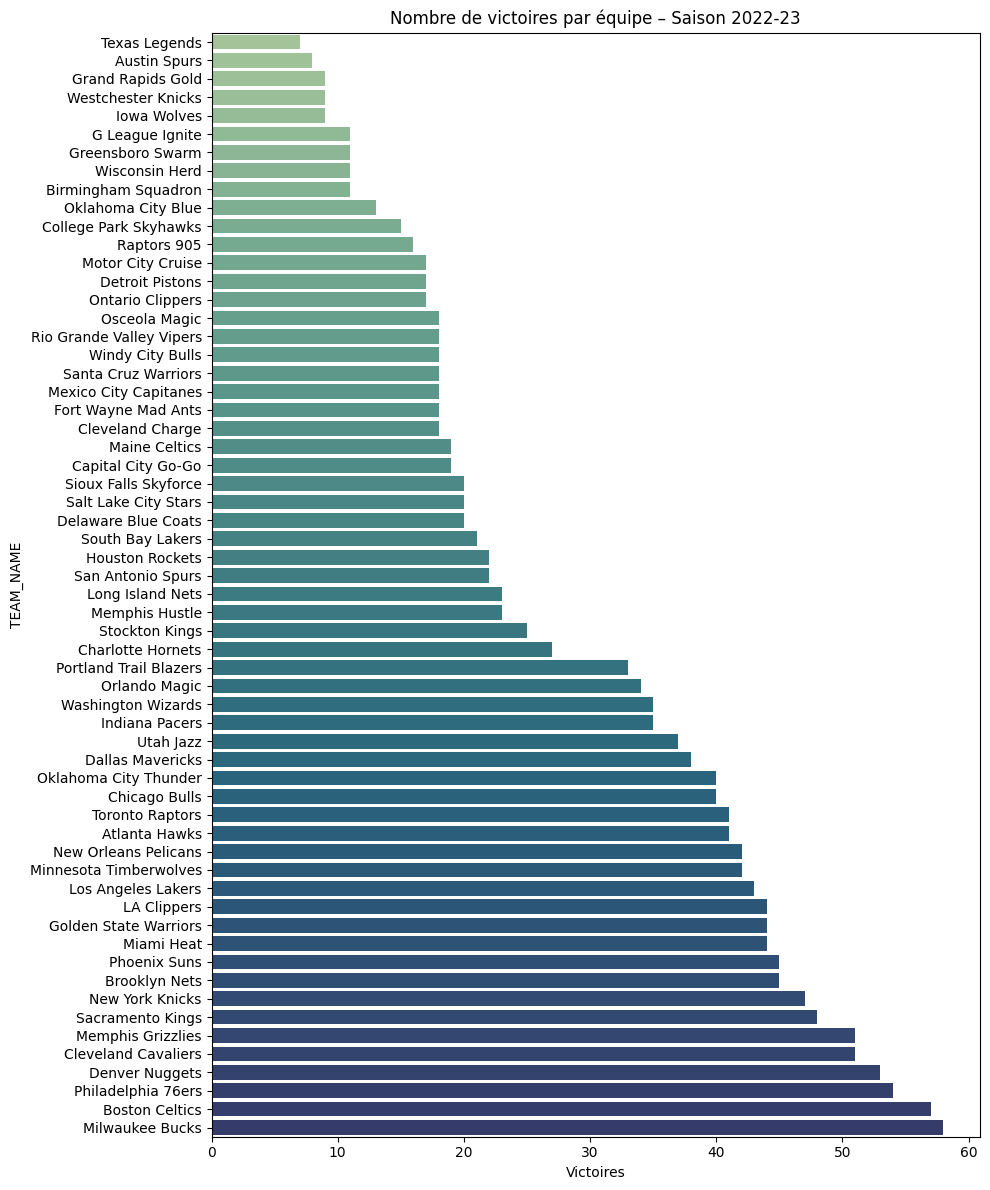

In [16]:
win_counts = games_df[games_df['WL'] == 'W'].groupby('TEAM_NAME').count()['WL'].sort_values()

plt.figure(figsize=(10, 12))
sns.barplot(x=win_counts.values, y=win_counts.index, palette='crest')
plt.title("Nombre de victoires par équipe – Saison 2022-23")
plt.xlabel("Victoires")
plt.tight_layout()
plt.show()


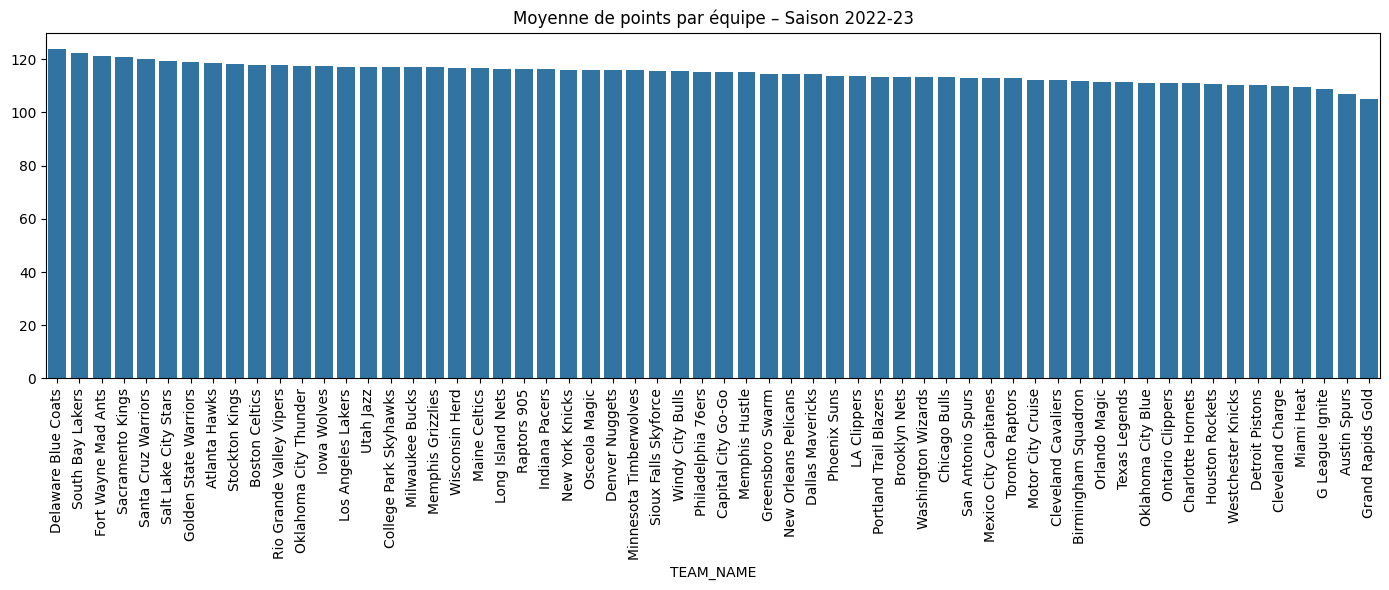

In [17]:
avg_pts = games_df.groupby('TEAM_NAME')['PTS'].mean().sort_values(ascending=False)

plt.figure(figsize=(14, 6))
sns.barplot(x=avg_pts.index, y=avg_pts.values)
plt.xticks(rotation=90)
plt.title("Moyenne de points par équipe – Saison 2022-23")
plt.tight_layout()
plt.show()


## Construction du dataset Machine Learning

L’API donne 1 ligne par équipe et par match.
Nous allons regrouper ces lignes pour avoir une seule ligne par match, et prédire si l’équipe à domicile va gagner.


In [19]:
games_df['HOME'] = games_df['MATCHUP'].apply(lambda x: 1 if "vs." in x else 0)
games_df['OPPONENT'] = games_df['MATCHUP'].apply(lambda x: x.split()[-1])
games_df['UNIQUE_GAME_ID'] = games_df['GAME_ID'].astype(str) + "_" + games_df['TEAM_NAME']

pivot_df = games_df.pivot(index='GAME_ID', columns='HOME', values=['TEAM_NAME', 'PTS'])
pivot_df.columns = ['AWAY_TEAM', 'HOME_TEAM', 'AWAY_PTS', 'HOME_PTS']
pivot_df = pivot_df.dropna().reset_index()
pivot_df['HOME_WIN'] = (pivot_df['HOME_PTS'] > pivot_df['AWAY_PTS']).astype(int)

pivot_df


,GAME_ID,AWAY_TEAM,HOME_TEAM,AWAY_PTS,HOME_PTS,HOME_WIN
0,0022200001,Philadelphia 76ers,Boston Celtics,117,126,1
1,0022200002,Los Angeles Lakers,Golden State Warriors,109,123,1
2,0022200003,Orlando Magic,Detroit Pistons,109,113,1
3,0022200004,Washington Wizards,Indiana Pacers,114,107,0
4,0022200005,Houston Rockets,Atlanta Hawks,107,117,1
...,...,...,...,...,...,...
1705,2022200476,Osceola Magic,Iowa Wolves,133,121,0
1706,2022200477,Memphis Hustle,Sioux Falls Skyforce,88,116,1
1707,2022200478,G League Ignite,South Bay Lakers,96,120,1
1708,2022200479,Long Island Nets,Rio Grande Valley Vipers,116,135,1


## Modélisation – Prédire la victoire de l’équipe à domicile

Nous allons entraîner un modèle simple (régression logistique) avec 2 variables :
- Écart de points
- Total des points


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

pivot_df['POINT_DIFF'] = pivot_df['HOME_PTS'] - pivot_df['AWAY_PTS']
pivot_df['TOTAL_PTS'] = pivot_df['HOME_PTS'] + pivot_df['AWAY_PTS']

X = pivot_df[['POINT_DIFF', 'TOTAL_PTS']]
y = pivot_df['HOME_WIN']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("🎯 Accuracy :", accuracy_score(y_test, y_pred))
print("📊 Matrice de confusion :\n", confusion_matrix(y_test, y_pred))


🎯 Accuracy : 1.0
📊 Matrice de confusion :
 [[224   0]
 [  0 289]]


## Analyse des performances individuelles des joueurs

Nous allons extraire les moyennes de points, rebonds, passes, pertes de balle et 3-points réussis par joueur actif sur la saison 2022-23.


In [22]:
from nba_api.stats.endpoints import playergamelog

player_stats = []
for p in players.get_active_players()[:50]:  # Augmente à 450 si tu veux tout
    try:
        log = playergamelog.PlayerGameLog(player_id=p['id'], season='2022-23')
        df = log.get_data_frames()[0]
        stats = {
            'PLAYER': p['full_name'],
            'PTS': df['PTS'].mean(),
            'REB': df['REB'].mean(),
            'AST': df['AST'].mean(),
            'TOV': df['TOV'].mean(),
            'FG3M': df['FG3M'].mean(),
            'GP': df.shape[0]
        }
        player_stats.append(stats)
        time.sleep(0.4)
    except:
        continue

players_df = pd.DataFrame(player_stats).dropna().reset_index(drop=True)
players_df


,PLAYER,PTS,REB,AST,TOV,FG3M,GP
0,Precious Achiuwa,9.236364,5.963636,0.909091,1.072727,0.527273,55
1,Steven Adams,8.595238,11.547619,2.309524,1.880952,0.000000,42
2,Bam Adebayo,20.386667,9.173333,3.200000,2.493333,0.013333,75
3,Ochai Agbaji,7.915254,2.050847,1.135593,0.694915,1.372881,59
4,Santi Aldama,9.038961,4.818182,1.259740,0.779221,1.220779,77
5,Nickeil Alexander-Walker,6.152542,1.711864,1.830508,0.932203,1.033898,59
6,Grayson Allen,10.416667,3.291667,2.263889,1.000000,2.027778,72
7,Jarrett Allen,14.250000,9.794118,1.661765,1.367647,0.014706,68
8,Jose Alvarado,9.016393,2.311475,3.049180,1.327869,1.360656,61
9,Kyle Anderson,9.376812,5.333333,4.855072,1.492754,0.623188,69


## Top 10 scoreurs de la saison

Voici les 10 joueurs ayant la meilleure moyenne de points sur la saison 2022-23.


/var/folders/b_/ckrclmps2b366b3xn9b2b2dm0000gn/T/ipykernel_37819/2599633318.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PTS', y='PLAYER', data=top_scorers, palette='Reds_r')


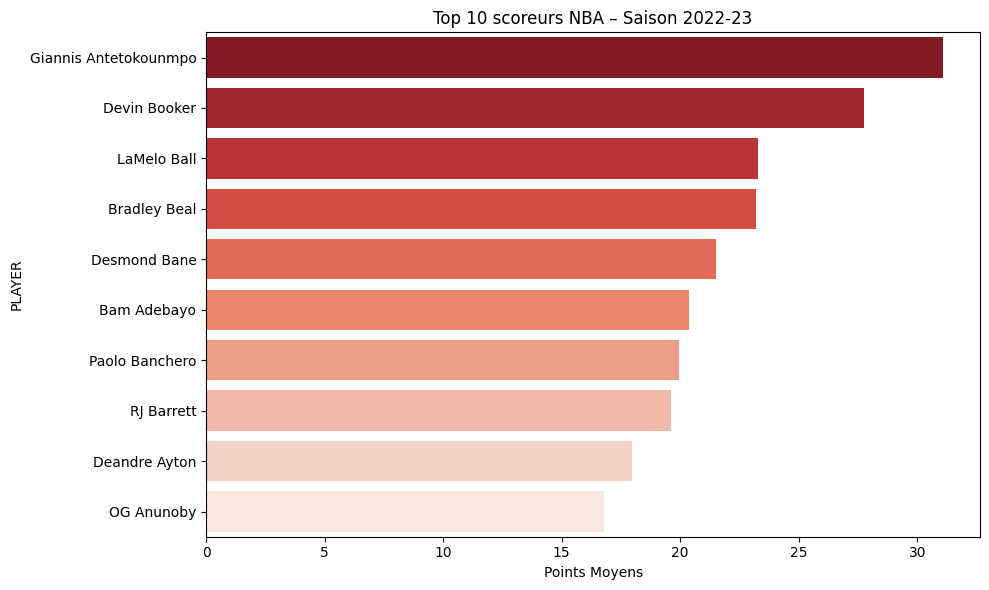

In [23]:
top_scorers = players_df.sort_values('PTS', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='PTS', y='PLAYER', data=top_scorers, palette='Reds_r')
plt.title("Top 10 scoreurs NBA – Saison 2022-23")
plt.xlabel("Points Moyens")
plt.tight_layout()
plt.show()


## Clustering – Identifier des profils types de joueurs

Nous allons appliquer un K-Means clustering sur les stats moyennes (points, rebonds, passes, etc.)
pour découvrir automatiquement des profils de joueurs (scoreurs, pivots, meneurs…).


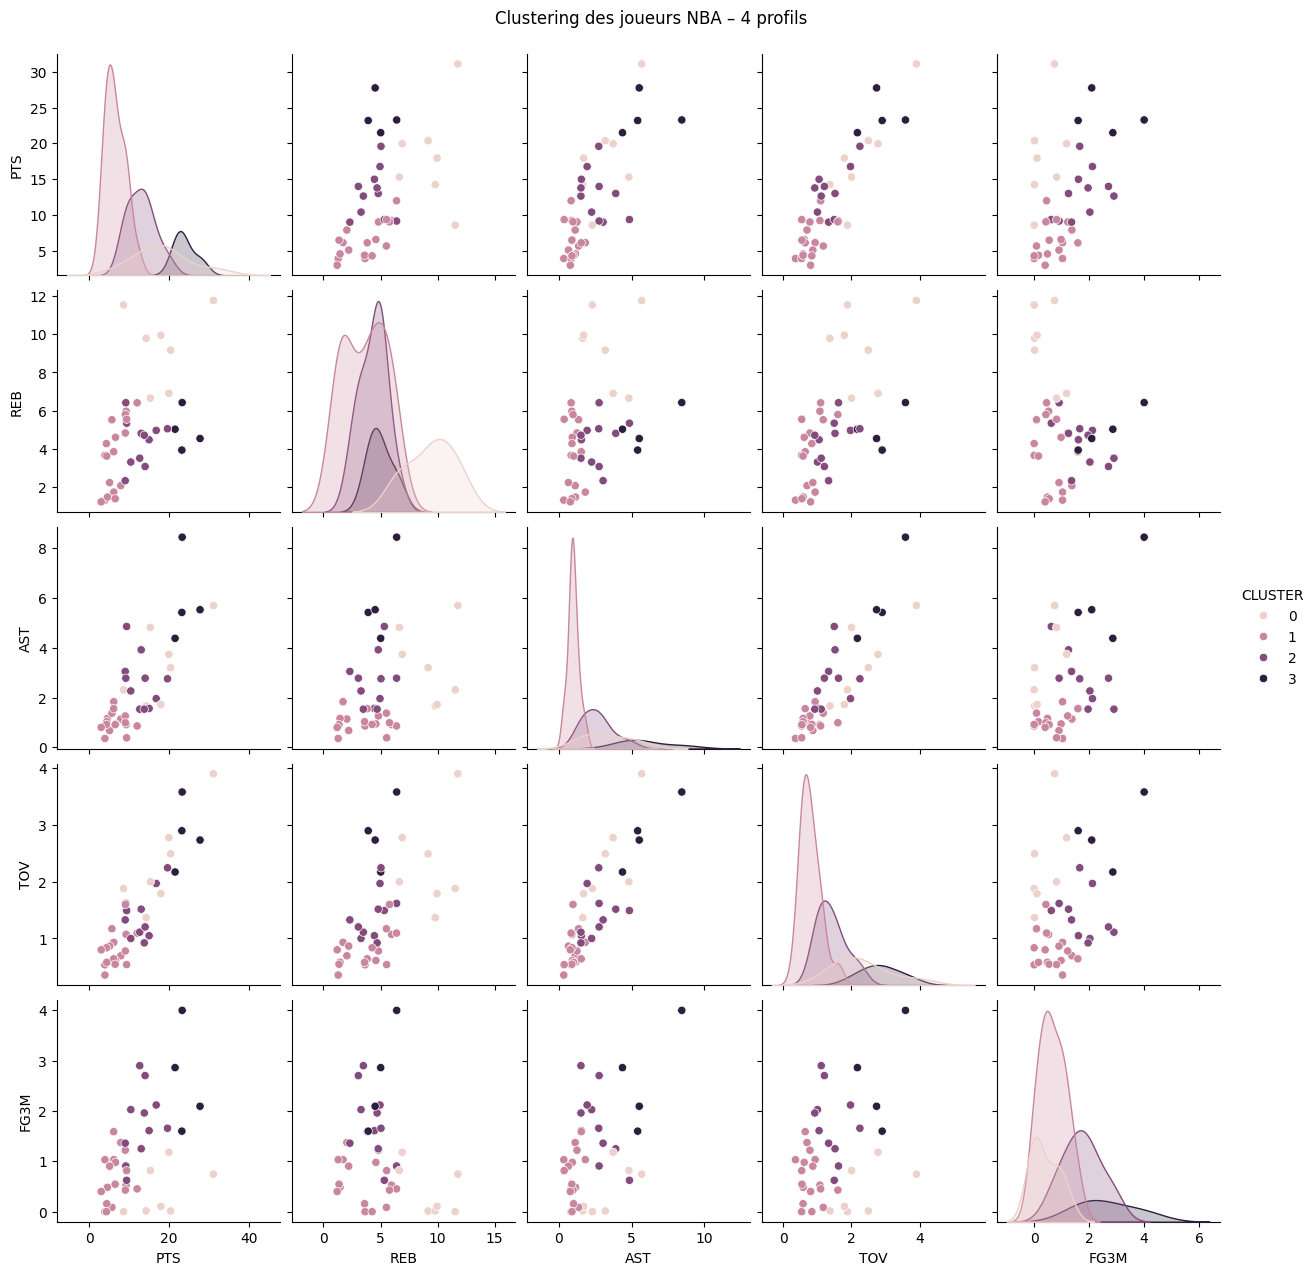

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

features = ['PTS', 'REB', 'AST', 'TOV', 'FG3M']
X = players_df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=42)
players_df['CLUSTER'] = kmeans.fit_predict(X_scaled)

sns.pairplot(players_df, hue='CLUSTER', vars=features)
plt.suptitle("Clustering des joueurs NBA – 4 profils", y=1.02)
plt.show()


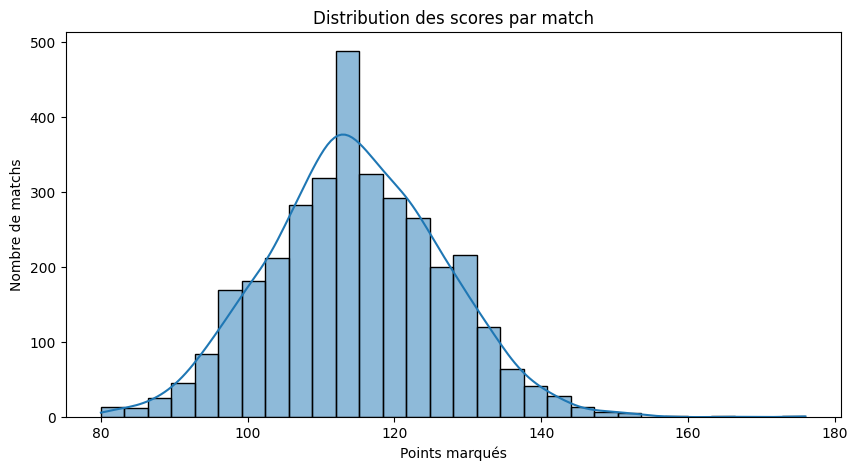

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(games_df['PTS'], bins=30, kde=True)
plt.title("Distribution des scores par match")
plt.xlabel("Points marqués")
plt.ylabel("Nombre de matchs")
plt.show()


/var/folders/b_/ckrclmps2b366b3xn9b2b2dm0000gn/T/ipykernel_37819/277734581.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_avg.values, y=team_avg.index, palette="Blues_d")


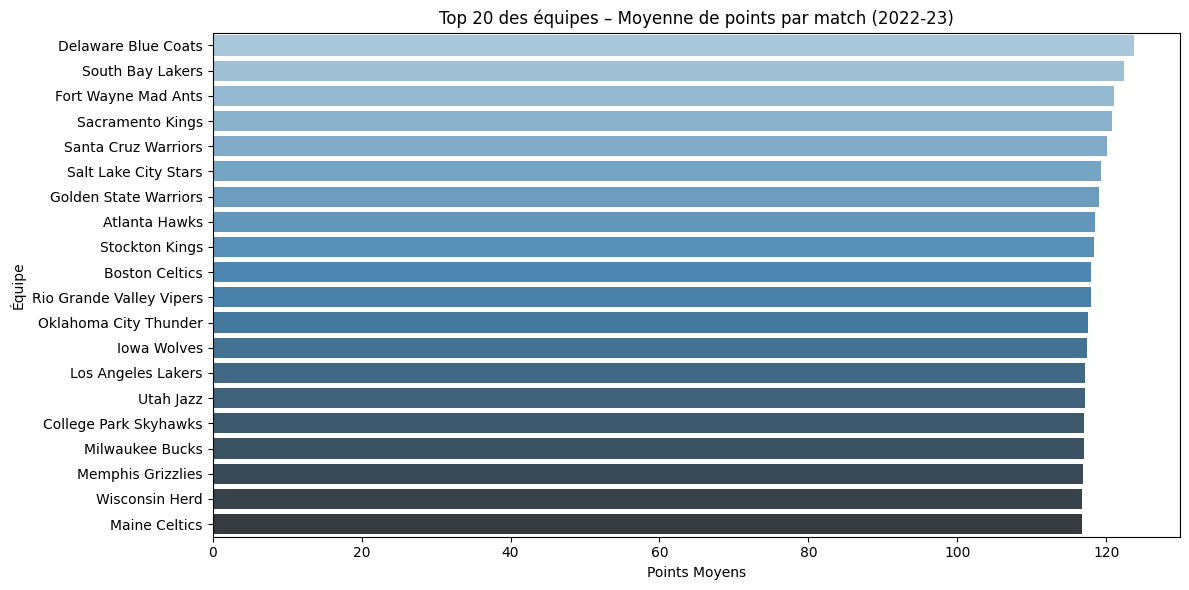

In [7]:
# Trier les équipes par points moyens
team_avg = games_df.groupby('TEAM_NAME')['PTS'].mean().sort_values(ascending=False).head(20)

plt.figure(figsize=(12,6))
sns.barplot(x=team_avg.values, y=team_avg.index, palette="Blues_d")
plt.title("Top 20 des équipes – Moyenne de points par match (2022-23)")
plt.xlabel("Points Moyens")
plt.ylabel("Équipe")
plt.tight_layout()
plt.show()


## 2. Analyse Exploratoire – Scores et Performances

On observe une distribution centrée autour de 110 points par match. Certaines équipes, comme les Sacramento Kings ou Golden State Warriors, ont des scores moyens bien plus élevés.

Cela reflète leur style de jeu offensif rapide.


In [8]:
# On trie par taux de victoire
sorted_winrate = winrate.sort_values('Win Rate (%)', ascending=True)

# Affichage horizontal
plt.figure(figsize=(10, 12))
sns.barplot(x='Win Rate (%)', y=sorted_winrate.index, data=sorted_winrate, palette="coolwarm")
plt.title("Taux de victoire par équipe – Saison 2022-23")
plt.xlabel("Taux de victoire (%)")
plt.ylabel("Équipe")
plt.tight_layout()
plt.show()


NameError: name 'winrate' is not defined

## 3. Performance des équipes

Le graphique ci-dessus classe les équipes selon leur pourcentage de victoire. On retrouve en haut du classement les équipes les plus compétitives de la saison régulière.

Cela permet déjà de dégager les favoris.


In [ ]:
lebron_id = players.find_players_by_full_name("LeBron James")[0]['id']
lebron_gamelog = playergamelog.PlayerGameLog(player_id=lebron_id, season='2022-23')
lebron_df = lebron_gamelog.get_data_frames()[0]

# Points par match
plt.figure(figsize=(10,5))
plt.plot(lebron_df['GAME_DATE'], lebron_df['PTS'], marker='o')
plt.xticks(rotation=45)
plt.title("Points marqués par LeBron James (2022-23)")
plt.xlabel("Date du match")
plt.ylabel("Points")
plt.tight_layout()
plt.show()
